In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [234]:
import random

In [173]:
digits_train = pd.read_csv(r"C:\Users\vamsi katam\Desktop\ML_In_Hands\Machine-Learning\Datasets\MNIST\train.zip")

In [174]:
digits_test = pd.read_csv(r"C:\Users\vamsi katam\Desktop\ML_In_Hands\Machine-Learning\Datasets\MNIST\test.zip")

In [175]:
digits_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
print("We have {} rows and {} columns in the train dataset ".format(digits_train.shape[0],digits_train.shape[1]))
print("We have {} rows and {} columns in the test dataset ".format(digits_test.shape[0],digits_test.shape[1]))

We have 42000 rows and 785 columns in the train dataset 
We have 28000 rows and 784 columns in the test dataset 


In [177]:
#lets look into the labels 
sorted(digits_train.label.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [178]:
digits_train.iloc[7].head()

label     3
pixel0    0
pixel1    0
pixel2    0
pixel3    0
Name: 7, dtype: int64

In [179]:
digit = digits_train.iloc[18]

In [180]:
digit_pixels = digit[1:]

In [181]:
print(digit.label)

7


In [182]:
# lets reshape the digit pixels into 28 x 28
digit_pixels= np.array(digit_pixels).reshape(28,28)

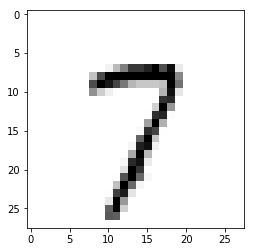

In [183]:
# let have a look into the image by arranging the pixels using the matplotlib library

from matplotlib.cm import binary
plt.imshow(digit_pixels,cmap = binary,interpolation='nearest')
plt.axes = "off"
plt.show()

### Now we got confirmed that the row 15 has the pixels of image of 7. we just got confirmed that by rearranging the pixels to an image

In [184]:
digits_X = digits_train.drop("label",axis=1)
digits_y = digits['label']

#### Lets prepare the data for the ML model creation

In [185]:
# lets split the data 
from sklearn.model_selection import train_test_split

In [186]:
# X_train,X_test,y_train,y_test = train_test_split(digits_X,digits_y,test_size = 0.2)

X_train = digits_train.drop("label",axis=1)
y_train = digits_train["label"]
X_test  = digits_test

In [187]:
for _ in (X_train,X_test,y_train):
    print(_.shape)

(42000, 784)
(28000, 784)
(42000,)


### Lets Build a Binary Classification 

### Problem Definition : 
    Our Classification model, which take the input as image of size 784 which contain the human written digit, then it should be able to predict 1 if incase of digit is 7 and should be able to predict 0 if incase of digit is non 7(0...9)

In [188]:
y_train.head(10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [189]:
(y_train == 7).head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: label, dtype: bool

In [190]:
digit_y_train_label = (y_train == 7)

In [191]:
digit_y_train_label.shape

(42000,)

In [192]:
digit_y_train_label.value_counts()

False    37599
True      4401
Name: label, dtype: int64

In [193]:
(30081/33600)

0.8952678571428572

In [194]:
# can replace the false with 0 and true with 1 

digit_y_train_label.apply(lambda x : 1 if x == True else 0).head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: label, dtype: int64

In [195]:
# let count how many 7 are there in the data

digit_y_train_label[digit_y_train_label == True].shape

(4401,)

### Standardise the train data before we apply the SGD Algorithm

In [196]:
# lets create a pipeline 

pipeline_min_max_scaler = Pipeline([
    ('minMaxScaler',MinMaxScaler())
])

In [197]:
digit_X_train = pipeline_min_max_scaler.fit_transform(X_train)

#### Let use the SGD algorithm to build the classification model

In [198]:
from sklearn.linear_model import SGDClassifier

### By default the SGDClassifier has the loss funtion as hinge loss, which is quite popular for the SVM models 

When we use "hinge" loss as the costfuction, then we will be building "Linear SVM"

When we use "log" loss as the costfuntion, then we will be building "Logistic Regression"


In [199]:
sgd_clf = SGDClassifier(random_state=3,loss="log")

In [200]:
sgd_clf.fit(digit_X_train,digit_y_train_label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=3, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [201]:
digit_y_train_label.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: label, dtype: bool

In [202]:
# predictions on the train dataset 

In [203]:
sgd_train_predictions = sgd_clf.predict(digit_X_train)

In [204]:
sgd_train_predictions[:10]

array([False, False, False, False, False, False,  True, False, False,
       False])

In [205]:
sgd_train_prob_predictions = sgd_clf.predict_proba(digit_X_train)

In [206]:
sgd_train_prob_predictions[:10][:,1]

array([1.82220918e-06, 4.16898909e-07, 1.99905521e-03, 3.94954713e-03,
       1.49017469e-10, 5.89460131e-05, 9.98488063e-01, 1.66988156e-02,
       4.05949528e-07, 6.80370342e-05])

In [207]:
9.96460447*(10**-1)

0.996460447

### Lets build a "Logistic Regression" Classification model ,it uses a non Gradient Descent solver called "liblinear" by default, and check out what other solver can be used

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
logistic_clf = LogisticRegression(C=1e9,
                                  random_state=3,
#                                   max_iter=400,
#                                   solver="liblinear"
                                   ) # C is regulaisation parameter, Regularised logistic regression 

In [210]:
logistic_clf.fit(digit_X_train,digit_y_train_label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### What is C ?

###  Inverse of Regularization strenght (C = 1/lambda) ; must be a positive float.Like in support vector machines small values specify strong regularization

#### Large value for C == > Weak Regularization

#### Small value for C == > Strong Regularization

### Measuring the accuracy score using Cross_val_Score 

In [211]:
from sklearn.model_selection import GridSearchCV

In [152]:
grid = {'C' : [1e9,1e5,1e6,1e7,1e8],
        'max_iter' : list(range(100,1001,100)),
        'random_state' : list(range(3,10,1)),
        'solver' : ['lbfgs','liblinear',"sag"]
       }

In [153]:
# grid_search = GridSearchCV(logistic_clf,param_grid=grid,cv=3,verbose=3)

In [154]:
#grid_search.fit(digit_X_train,digit_y_train_label)

In [155]:
#  C=1000000000.0, max_iter=300, random_state=3, solver=sag, score=0.981, total= 1.8min

In [212]:
logistic_clf = LogisticRegression( C=1000000000.0, max_iter=500, random_state=3, solver='sag')

In [213]:
logistic_clf.fit(digit_X_train,digit_y_train_label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
logistic_clf.score(digit_X_train,digit_y_train_label)

0.9875

In [215]:
predictions = logistic_clf.predict(X_test)

In [243]:
def print_digit(dig):
    dig = np.array(dig).reshape(28,28)
    plt.imshow(dig,cmap = binary,interpolation='nearest')
    plt.axes = "off"
    plt.show()
    

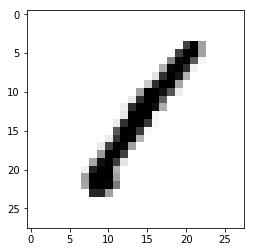

In [244]:
print_digit(X_train.iloc[0])

In [245]:
print(predictions[6])

False


472


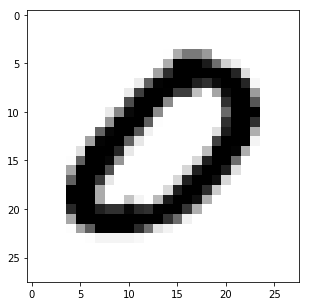

False
939


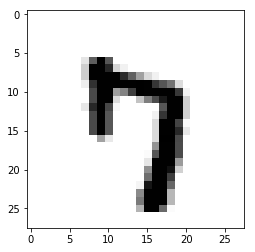

False
1512


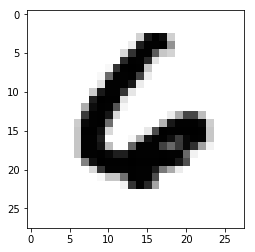

False
2343


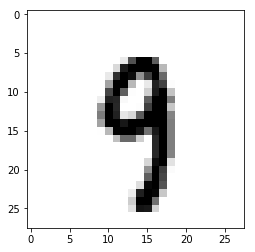

False
3945


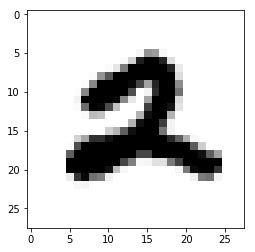

False
3853


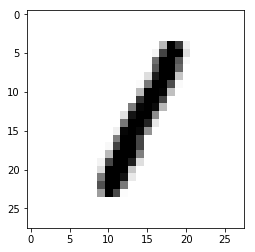

False
2869


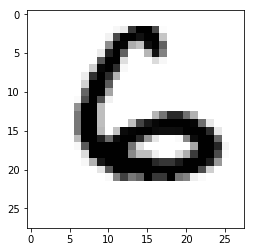

False
1111


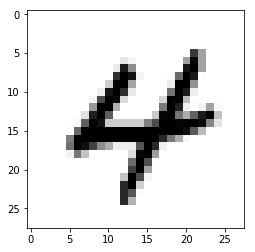

False
378


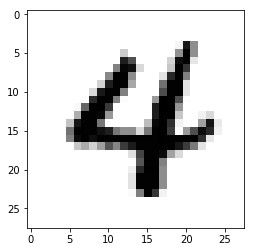

False
1077


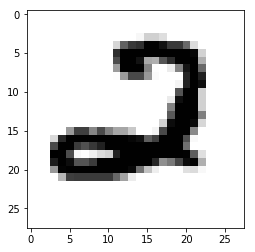

False
3528


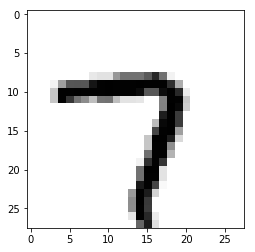

True
2412


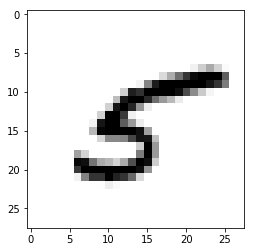

False
590


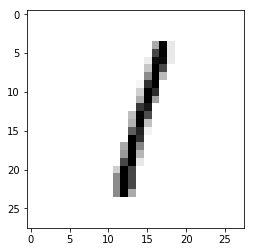

False
3317


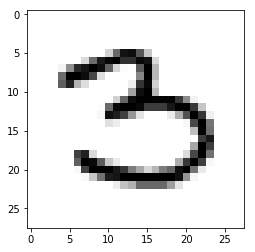

False
3710


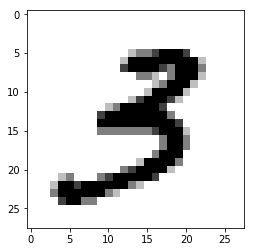

True
3904


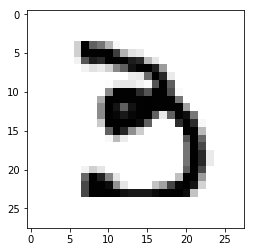

False
2033


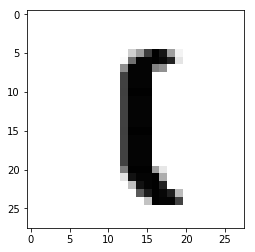

False
795


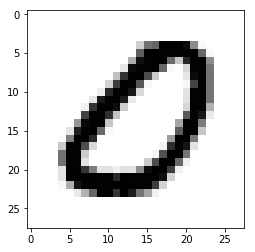

False
1852


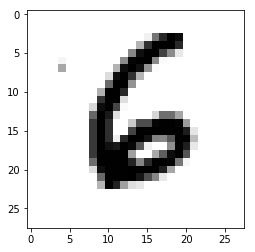

False
3043


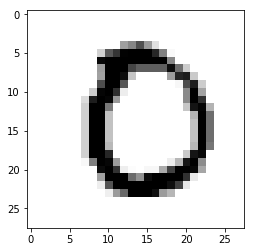

False
2085


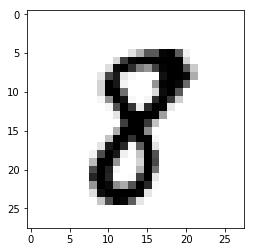

False
303


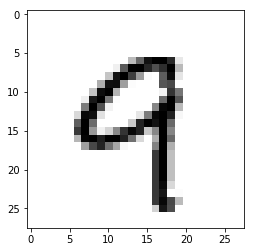

False
2052


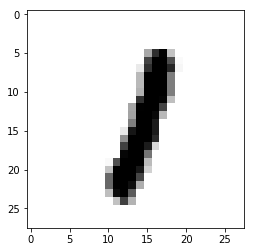

False
3759


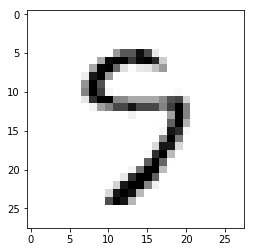

False
541


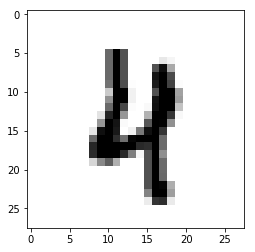

False


In [261]:
randinteger = np.random.randint(100,4000,size=25)
plt.figure(figsize=(5,5))
for i in randinteger:
    print(i)
    print_digit(X_train.iloc[i])
    print(predictions[i])